> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigating Emissions Datasets

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [22]:
# Use this cell to set up import statements for all of the packages that you
# plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties
In this section we will import csv files and create a different dataframe for each file imported from Gapminder. The files imported are:
1. CO2 emissions (tonnes per person): Carbon dioxide emissions from the burning of fossil fuels (metric tonnes of CO2 per person)
2. Yearly CO2 emissions (1000 tonnes): total carbon dioxide emissions from the burning of fosil fuels during the given year (1000 metric tonnes of CO2)
3. CO2 intensity of economic output (kg CO2 per 2011 PPP USD of GDP): carbon dioxide emissions are those stemming from the burning of fossil fuels and the manufacture of cement. They incude carbon dioxide produced during consumption of solid, liquid, and gas fuels and gas flaring.
4. Cumulative CO2 emissions (tonnes): total CO2 emissions from fossil fuel for the period between 1751 and the relevant year in metric tonnes.
5. Sulfur emissions per person (kg): sulfur emissions per person. Associated with acid rain. (Kilograms of sulfur per person and year)
6. Total sulfur emissions (kilotonnes): total sulfur emissions per year. Associated with acid rain. 1000 tonnes of sulfur per year.


In [23]:
# Import csv files
co2_emissions = pd.read_csv('co2_emissions_tonnes_per_person.csv')
yearly_co2_emissions = pd.read_csv('yearly_co2_emissions_1000_tonnes.csv')
co2_intensity = pd.read_csv('co2_intensity_of_economic_output_kg_co2_per_2011_ppp_of_gdp.csv')
cumulative_co2 = pd.read_csv('cumulative_co2_emissions_tonnes.csv')
sulfur_emissions = pd.read_csv('sulfur_emissions_per_person_kg.csv')
total_sulfur_emissions = pd.read_csv('total_sulfur_emission_kilotonnes.csv')

All these datafiles are set up the same way. In the first column we have the country name, followed by as many columns as there are years with data available on the aforementioned emissions studied.  

### Data Cleaning

After looking at the data and analyzing the composition of the different dataframes, I decided to allocate each country line to the respective continent to allow for some continent analyses. To do this I am using a file that I downloaded from the internet which reports the full list of countries in the world and assigns each country to a continent: Africa, Asia, Europe, North America, Oceania, and South America. 

In [24]:
# Import CSV of countries and continents
continents = pd.read_csv('Countries-Continents.csv')
continents.head()

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [25]:
# Check if the countries in countries-continents.csv have the same spelling as the countries in the emissions csv files

s1 = continents['Country'].unique()
s2 = co2_emissions['country'].unique()

for country1 in s1:
    if country1 not in s2:
        print country1

Burkina
Congo
Congo, Democratic Republic of
Ivory Coast
Burma (Myanmar)
East Timor
Korea, North
Korea, South
Kyrgyzstan
Laos
Russian Federation
CZ
Macedonia
Monaco
San Marino
Slovakia
Vatican City
Saint Kitts and Nevis
Saint Lucia
Saint Vincent and the Grenadines
US
Micronesia


In [26]:
for country2 in s2:
    if country2 not in s1:
        print country2 

Burkina Faso
Congo, Dem. Rep.
Congo, Rep.
Cote d'Ivoire
Czech Republic
Kyrgyz Republic
Lao
Macedonia, FYR
Micronesia, Fed. Sts.
Myanmar
North Korea
Palestine
Russia
Slovak Republic
South Korea
St. Kitts and Nevis
St. Lucia
St. Vincent and the Grenadines
Timor-Leste
United States


In [27]:
# Align country names
continents = continents.replace('Burkina','Burkina Faso')
continents = continents.replace('Congo','Congo, Rep.')
continents = continents.replace('Congo, Democratic Republic of','Congo, Dem. Rep.')
continents = continents.replace('Ivory Coast',"Cote d'Ivoire")
continents = continents.replace('Burma (Myanmar)','Myanmar')
continents = continents.replace('East Timor','Timor-Leste')
continents = continents.replace('Korea, North','North Korea')
continents = continents.replace('Korea, South','South Korea')
continents = continents.replace('Kyrgyzstan','Kyrgyz Republic')
continents = continents.replace('Laos','Lao')
continents = continents.replace('Russian Federation','Russia')
continents = continents.replace('CZ','Czech Republic')
continents = continents.replace('Macedonia','Macedonia, FYR')
continents = continents.replace('Slovakia','Slovak Republic')
continents = continents.replace('Saint Kitts and Nevis','St. Kitts and Nevis')
continents = continents.replace('Saint Lucia','St. Lucia')
continents = continents.replace('Saint Vincent and the Grenadines','St. Vincent and the Grenadines')
continents = continents.replace('US','United States')
continents = continents.replace('Micronesia','Micronesia, Fed. Sts.')

In [28]:
s1 = continents['Country'].unique()
s2 = co2_emissions['country'].unique()

for country1 in s1:
    if country1 not in s2:
        print country1

Monaco
San Marino
Vatican City


In [29]:
for country2 in s2:
    if country2 not in s1:
        print country2 

Palestine


#### Add continents in the dataframes

In [30]:
# Assign a continent to each country for each file
co2_emissions = continents.merge(co2_emissions, left_on=['Country'], right_on=['country'], how='inner')

# # Debugging
# ## Check if 'country' and 'Country' are matching
# co2_emissions['is_equal'] =( co2_emissions['country'].str.lower().str.replace('s/+',"") == co2_emissions['Country'].str.lower().str.replace('s/+',""))
# co2_emissions.is_equal.unique()

# ## Check if all countries have a continent
# co2_emissions.Continent.unique()
# co2_emissions.drop(['Country', 'is_equal'], axis=1, inplace=True)

co2_emissions.drop(['Country'], axis=1, inplace=True)

yearly_co2_emissions = continents.merge(yearly_co2_emissions, left_on=['Country'], right_on=['country'], how='inner')
yearly_co2_emissions.drop(['Country'], axis=1, inplace=True)

co2_intensity = continents.merge(co2_intensity, left_on=['Country'], right_on=['country'], how='inner')
co2_intensity.drop(['Country'], axis=1, inplace=True)

cumulative_co2 = continents.merge(cumulative_co2, left_on=['Country'], right_on=['country'], how='inner')
cumulative_co2.drop(['Country'], axis=1, inplace=True)

sulfur_emissions = continents.merge(sulfur_emissions, left_on=['Country'], right_on=['country'], how='inner')
sulfur_emissions.drop(['Country'], axis=1, inplace=True)

total_sulfur_emissions = continents.merge(total_sulfur_emissions, left_on=['Country'], right_on=['country'], how='inner')
total_sulfur_emissions.drop(['Country'], axis=1, inplace=True)

#### Merge the world map with the emissions dataframes 

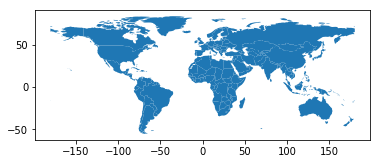

In [31]:
%matplotlib inline
import geopandas

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world.plot()

In [32]:
s3 = world['name'].unique()
s4 = co2_emissions['country'].unique()

for country3 in s3:
    if country3 not in s4:
        print country3

Fr. S. Antarctic Lands
Bosnia and Herz.
Central African Rep.
Côte d'Ivoire
Dem. Rep. Congo
Congo
N. Cyprus
Czech Rep.
Dominican Rep.
Falkland Is.
Eq. Guinea
Greenland
Kyrgyzstan
Korea
Kosovo
Lao PDR
Macedonia
New Caledonia
Puerto Rico
Dem. Rep. Korea
Palestine
S. Sudan
Solomon Is.
Somaliland
Slovakia
Taiwan


In [33]:
for country4 in s4:
    if country4 not in s3:
        print country4

Cape Verde
Central African Republic
Comoros
Congo, Rep.
Congo, Dem. Rep.
Equatorial Guinea
Cote d'Ivoire
Mauritius
Sao Tome and Principe
Seychelles
South Sudan
Bahrain
North Korea
South Korea
Kyrgyz Republic
Lao
Maldives
Singapore
Andorra
Bosnia and Herzegovina
Czech Republic
Liechtenstein
Macedonia, FYR
Malta
Slovak Republic
Antigua and Barbuda
Barbados
Dominica
Dominican Republic
Grenada
St. Kitts and Nevis
St. Lucia
St. Vincent and the Grenadines
Kiribati
Marshall Islands
Micronesia, Fed. Sts.
Nauru
Palau
Samoa
Solomon Islands
Tonga
Tuvalu


In [34]:
#Align Country Names
#world = world.replace('W. Sahara','')
world = world.replace('United States of America','United States')
world = world.replace('Dem. Rep. Congo','Congo, Dem. Rep.')
world = world.replace('Dominican Rep.','Dominican Republic')
#world = world.replace('Falkland Is.','')
#world = world.replace('Greenland','')
#world = world.replace('Fr. S. Antarctic Lands','')
#world = world.replace('Puerto Rico','')
world = world.replace('Côte d\'Ivoire','Cote d\'Ivoire')
world = world.replace('Central African Rep.','Central African Republic')
world = world.replace('Congo','Congo, Rep.')
world = world.replace('Eq. Guinea','Equatorial Guinea')
world = world.replace('eSwatini','Swaziland')
#world = world.replace('Palestine','')
world = world.replace('Laos','Lao')
world = world.replace('Kyrgyzstan','Kyrgyz Republic')
#world = world.replace('New Caledonia','')
world = world.replace('Solomon Is.','Solomon Islands')
#world = world.replace('Taiwan','')
world = world.replace('Slovakia','Slovak Republic')
world = world.replace('Czechia','Czech Republic')
#world = world.replace('Antarctica','')
#world = world.replace('N. Cyprus','')
#world = world.replace('Somaliland','')
world = world.replace('Bosnia and Herz.','Bosnia and Herzegovina')
world = world.replace('Macedonia','Macedonia, FYR')
#world = world.replace('Kosovo','')
world = world.replace('S. Sudan','South Sudan')

In [35]:
s3 = world['name'].unique()
s4 = co2_emissions['country'].unique()

for country3 in s3:
    if country3 not in s4:
        print country3

Fr. S. Antarctic Lands
Côte d'Ivoire
N. Cyprus
Czech Rep.
Falkland Is.
Greenland
Korea
Kosovo
Lao PDR
New Caledonia
Puerto Rico
Dem. Rep. Korea
Palestine
Somaliland
Taiwan


In [36]:
for country4 in s4:
    if country4 not in s3:
        print country4

Cape Verde
Comoros
Cote d'Ivoire
Mauritius
Sao Tome and Principe
Seychelles
Bahrain
North Korea
South Korea
Lao
Maldives
Singapore
Andorra
Czech Republic
Liechtenstein
Malta
Antigua and Barbuda
Barbados
Dominica
Grenada
St. Kitts and Nevis
St. Lucia
St. Vincent and the Grenadines
Kiribati
Marshall Islands
Micronesia, Fed. Sts.
Nauru
Palau
Samoa
Tonga
Tuvalu


Not all the countries could be aligned.

In [37]:
# Merge the world map

co2_emissions = world.merge(co2_emissions, left_on=['name'], right_on=['country'], how='inner')
co2_emissions.drop(['name', 'continent'], axis=1, inplace=True)

yearly_co2_emissions = world.merge(yearly_co2_emissions, left_on=['name'], right_on=['country'], how='inner')
yearly_co2_emissions.drop(['name', 'continent'], axis=1, inplace=True)

co2_intensity = world.merge(co2_intensity, left_on=['name'], right_on=['country'], how='inner')
co2_intensity.drop(['name', 'continent'], axis=1, inplace=True)

cumulative_co2 = world.merge(cumulative_co2, left_on=['name'], right_on=['country'], how='inner')
cumulative_co2.drop(['name', 'continent'], axis=1, inplace=True)

sulfur_emissions = world.merge(sulfur_emissions, left_on=['name'], right_on=['country'], how='inner')
sulfur_emissions.drop(['name', 'continent'], axis=1, inplace=True)

total_sulfur_emissions = world.merge(total_sulfur_emissions, left_on=['name'], right_on=['country'], how='inner')
total_sulfur_emissions.drop(['name', 'continent'], axis=1, inplace=True)

In [38]:
np.max(yearly_co2_emissions)

pop_est                                             1.33861e+09
iso_a3                                                      ZWE
gdp_md_est                                           1.5094e+07
geometry      POLYGON ((35.82110070165024 33.2774264592763, ...
Continent                                         South America
country                                                Zimbabwe
1751                                                       9360
1752                                                       9360
1753                                                       9360
1754                                                       9370
1755                                                       9370
1756                                                      10000
1757                                                      10000
1758                                                      10000
1759                                                      10000
1760                                    

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Mapping the World

In [39]:
# http://geopandas.org/mapping.html

In [40]:
df = yearly_co2_emissions
df.drop(['pop_est','iso_a3','gdp_md_est','geometry','Continent','country'], axis=1, inplace=True)
valuemax = np.max(df)
vmax = valuemax.max()
vmax

10300000.0

AttributeError: No geometry data set yet (expected in column 'geometry'.

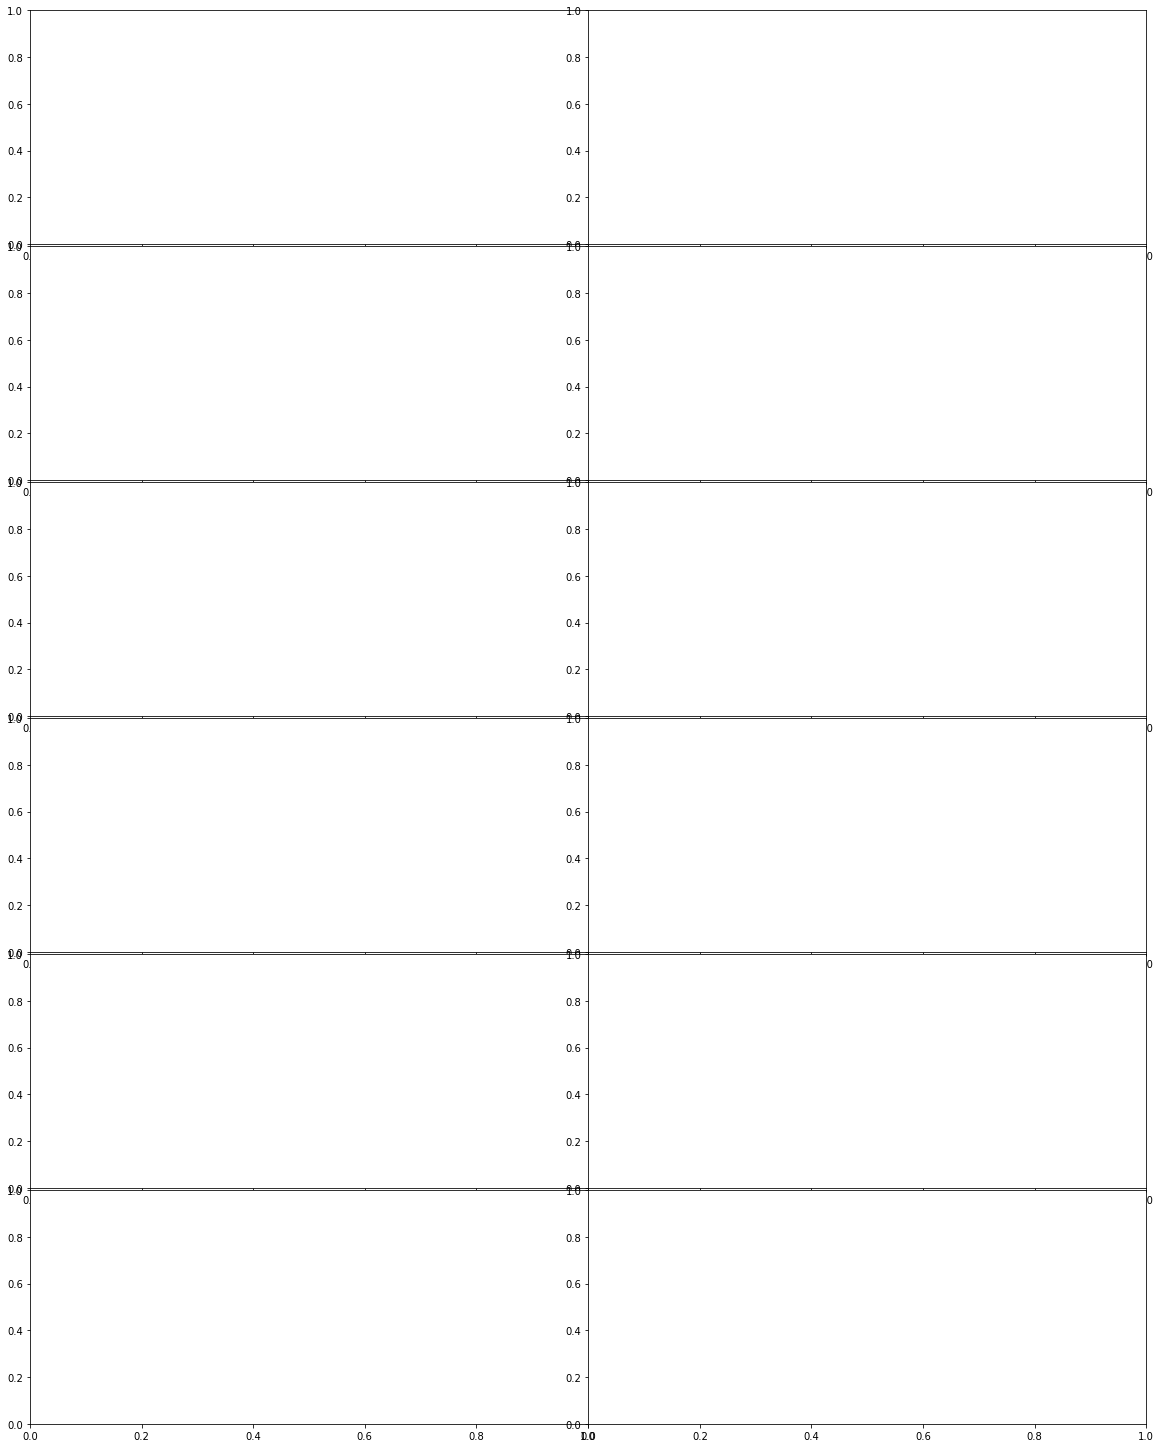

In [44]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

dataframe = yearly_co2_emissions

side_length = 20
fig, axes = plt.subplots(6, 2, figsize=(side_length, side_length*1.3))
fig.subplots_adjust(hspace=0.01, wspace=0.001)

# 1st subplot
ax = dataframe.plot(column='1880', axes=axes.flat[0], cmap='jet', edgecolor='gray', ax=ax, vmin = 0, vmax = 1.03e+7)
ax.set_title('1880')
ax.set_axis_off()
ax.set_aspect('equal')

# 2nd subplot
ax = dataframe.plot(column='1900', axes=axes.flat[1], cmap='jet', edgecolor='gray', ax=ax, vmin = 0, vmax = 1.03e+07)
ax.set_title('1900')
ax.set_axis_off()
ax.set_aspect('equal')

# 3rd subplot
ax = dataframe.plot(column='1920', axes=axes.flat[2], cmap='jet', edgecolor='gray', ax=ax, vmin = 0, vmax = 1.03e+07)
ax.set_title('1920')
ax.set_axis_off()
ax.set_aspect('equal')

# 4th subplot
ax = dataframe.plot(column='1940', axes=axes.flat[3], cmap='jet', edgecolor='gray', ax=ax, vmin = 0, vmax = 1.03e+07)
ax.set_title('1940')
ax.set_axis_off()
ax.set_aspect('equal')

# 5th subplot
ax = dataframe.plot(column='1950', axes=axes.flat[4], cmap='jet', edgecolor='gray', ax=ax, vmin = 0, vmax = 1.03e+07)
ax.set_title('1950')
ax.set_axis_off()
ax.set_aspect('equal')

# 6th subplot
ax = dataframe.plot(column='1960', axes=axes.flat[5], cmap='jet', edgecolor='gray', ax=ax, vmin = 0, vmax = 1.03e+07)
ax.set_title('1960')
ax.set_axis_off()
ax.set_aspect('equal')

# 7th subplot
ax = dataframe.plot(column='1970', axes=axes.flat[6], cmap='jet', edgecolor='gray', ax=ax, vmin = 0, vmax = 1.03e+07)
ax.set_title('1970')
ax.set_axis_off()
ax.set_aspect('equal')

# 8th subplot
ax = dataframe.plot(column='1980', axes=axes.flat[7], cmap='jet', edgecolor='gray', ax=ax, vmin = 0, vmax = 1.03e+07)
ax.set_title('1980')
ax.set_axis_off()
ax.set_aspect('equal')

# 9th subplot
ax = dataframe.plot(column='1990', axes=axes.flat[8], cmap='jet', edgecolor='gray', ax=ax, vmin = 0, vmax = 1.03e+07)
ax.set_title('1990')
ax.set_axis_off()
ax.set_aspect('equal')

# 10th subplot
ax = dataframe.plot(column='2000', axes=axes.flat[9], cmap='jet', edgecolor='gray', ax=ax, vmin = 0, vmax = 1.03e+07)
ax.set_title('2000')
ax.set_axis_off()
ax.set_aspect('equal')

# 11th subplot
ax = dataframe.plot(column='2010', axes=axes.flat[10], cmap='jet', edgecolor='gray', ax=ax, vmin = 0, vmax = 1.03e+07)
ax.set_title('2010')
ax.set_axis_off()
ax.set_aspect('equal')

# 12th subplot
ax = dataframe.plot(column='2014', axes=axes.flat[11], cmap='jet', edgecolor='gray', ax=ax, vmin = 0, vmax = 1.03e+07)
ax.set_title('2014')
ax.set_axis_off()
ax.set_aspect('equal')

# Add single colorbar
cax = fig.add_axes([0.95, 0.17, 0.02, 0.65])
sm = plt.cm.ScalarMappable(cmap='jet')
sm._A = []
cbar = fig.colorbar(sm, cax=cax, norm=None)
cbar.ax.set_title('Yearly CO2 Emissions *10^7')

#plt.savefig('CO2_heatmap.png', dpi=900)

### What is the evolution of Emissions in each continent?# 

We start by grouping the data by continent for each of the six datafiles.

In [ ]:
# Remove useless columns from dataframes
co2_emissions.drop(['pop_est','iso_a3','gdp_md_est','geometry'], axis=1, inplace=True)
yearly_co2_emissions.drop(['pop_est','iso_a3','gdp_md_est','geometry'], axis=1, inplace=True)
co2_intensity.drop(['pop_est','iso_a3','gdp_md_est','geometry'], axis=1, inplace=True)
cumulative_co2.drop(['pop_est','iso_a3','gdp_md_est','geometry'], axis=1, inplace=True)
sulfur_emissions.drop(['pop_est','iso_a3','gdp_md_est','geometry'], axis=1, inplace=True)
total_sulfur_emissions.drop(['pop_est','iso_a3','gdp_md_est','geometry'], axis=1, inplace=True)

co2_emissions.head()

In [ ]:
# Group data by continent ('Africa' 'Asia' 'Europe' 'North America' 'Oceania' 'South America')

co2_emissions_Africa = co2_emissions[co2_emissions.Continent =='Africa']
co2_emissions_Asia = co2_emissions[co2_emissions.Continent =='Asia']
co2_emissions_Europe = co2_emissions[co2_emissions.Continent =='Europe']
co2_emissions_NorthAmerica = co2_emissions[co2_emissions.Continent =='North America']
co2_emissions_Oceania = co2_emissions[co2_emissions.Continent =='Oceania']
co2_emissions_SouthAmerica = co2_emissions[co2_emissions.Continent =='South America']

yearly_co2_emissions_Africa = yearly_co2_emissions[yearly_co2_emissions.Continent =='Africa']
yearly_co2_emissions_Asia = yearly_co2_emissions[yearly_co2_emissions.Continent =='Asia']
yearly_co2_emissions_Europe = yearly_co2_emissions[yearly_co2_emissions.Continent =='Europe']
yearly_co2_emissions_NorthAmerica = yearly_co2_emissions[yearly_co2_emissions.Continent =='North America']
yearly_co2_emissions_Oceania = yearly_co2_emissions[yearly_co2_emissions.Continent =='Oceania']
yearly_co2_emissions_SouthAmerica = yearly_co2_emissions[yearly_co2_emissions.Continent =='South America']

co2_intensity_Africa = co2_intensity[co2_intensity.Continent =='Africa']
co2_intensity_Asia = co2_intensity[co2_intensity.Continent =='Asia']
co2_intensity_Europe = co2_intensity[co2_intensity.Continent =='Europe']
co2_intensity_NorthAmerica = co2_intensity[co2_intensity.Continent =='North America']
co2_intensity_Oceania = co2_intensity[co2_intensity.Continent =='Oceania']
co2_intensity_SouthAmerica = co2_intensity[co2_intensity.Continent =='South America']

cumulative_co2_Africa = cumulative_co2[cumulative_co2.Continent =='Africa']
cumulative_co2_Asia = cumulative_co2[cumulative_co2.Continent =='Asia']
cumulative_co2_Europe = cumulative_co2[cumulative_co2.Continent =='Europe']
cumulative_co2_NorthAmerica = cumulative_co2[cumulative_co2.Continent =='North America']
cumulative_co2_Oceania = cumulative_co2[cumulative_co2.Continent =='Oceania']
cumulative_co2_SouthAmerica = cumulative_co2[cumulative_co2.Continent =='South America']

sulfur_emissions_Africa = sulfur_emissions[sulfur_emissions.Continent =='Africa']
sulfur_emissions_Asia = sulfur_emissions[sulfur_emissions.Continent =='Asia']
sulfur_emissions_Europe = sulfur_emissions[sulfur_emissions.Continent =='Europe']
sulfur_emissions_NorthAmerica = sulfur_emissions[sulfur_emissions.Continent =='North America']
sulfur_emissions_Oceania = sulfur_emissions[sulfur_emissions.Continent =='Oceania']
sulfur_emissions_SouthAmerica = sulfur_emissions[sulfur_emissions.Continent =='South America']

total_sulfur_emissions_Africa = total_sulfur_emissions[total_sulfur_emissions.Continent =='Africa']
total_sulfur_emissions_Asia = total_sulfur_emissions[total_sulfur_emissions.Continent =='Asia']
total_sulfur_emissions_Europe = total_sulfur_emissions[total_sulfur_emissions.Continent =='Europe']
total_sulfur_emissions_NorthAmerica = total_sulfur_emissions[total_sulfur_emissions.Continent =='North America']
total_sulfur_emissions_Oceania = total_sulfur_emissions[total_sulfur_emissions.Continent =='Oceania']
total_sulfur_emissions_SouthAmerica = total_sulfur_emissions[total_sulfur_emissions.Continent =='South America']


#### Test for Correlation

In [ ]:
# Correlation Function
def correlation(x,y):
    std_x = (x - x.mean())/x.std(ddof=0)
    std_y = (y - y.mean())/y.std(ddof=0)
    
    return (std_x * std_y).mean()

In [ ]:
# correlation(co2_emissions_Africa['2000'],sulfur_emissions_Africa['2000'])

In [ ]:
# # Sum of emissions for each continent per person
# co2_emissions_Africa_sum = co2_emissions_Africa.sum(axis = 0, skipna = True, numeric_only = True) 
# co2_emissions_Africa_sum = pd.DataFrame(co2_emissions_Africa_sum, columns = ["Africa"])

# co2_emissions_Asia_sum = co2_emissions_Asia.sum(axis = 0, skipna = True, numeric_only = True) 
# co2_emissions_Asia_sum = pd.DataFrame(co2_emissions_Asia_sum, columns = ["Asia"])

# co2_emissions_Europe_sum = co2_emissions_Europe.sum(axis = 0, skipna = True, numeric_only = True) 
# co2_emissions_Europe_sum = pd.DataFrame(co2_emissions_Europe_sum, columns = ["Europe"])

# co2_emissions_NorthAmerica_sum = co2_emissions_NorthAmerica.sum(axis = 0, skipna = True, numeric_only = True) 
# co2_emissions_NorthAmerica_sum = pd.DataFrame(co2_emissions_NorthAmerica_sum, columns = ["North America"])

# co2_emissions_Oceania_sum = co2_emissions_Oceania.sum(axis = 0, skipna = True, numeric_only = True) 
# co2_emissions_Oceania_sum = pd.DataFrame(co2_emissions_Oceania_sum, columns = ["Oceania"])

# co2_emissions_SouthAmerica_sum = co2_emissions_SouthAmerica.sum(axis = 0, skipna = True, numeric_only = True) 
# co2_emissions_SouthAmerica_sum = pd.DataFrame(co2_emissions_SouthAmerica_sum, columns = ["South America"])

# co2_emissions_Continents_sum = pd.concat([co2_emissions_Africa_sum, co2_emissions_Asia_sum, co2_emissions_Europe_sum,co2_emissions_NorthAmerica_sum, co2_emissions_Oceania_sum, co2_emissions_SouthAmerica_sum], axis=1)

# co2_emissions_Continents_sum.plot(grid=True)


This method of assessing the CO2 emissions per person for the different countries is not representative of the relative emissions of the continent because by summing the values of each country, by default the continents with more countries will be resulting in higher CO2 emissions per person. The mean might be a better way to compare the continents and their emissions per person.

#### CO2 Emissions per person (Tonnes)

In [ ]:
# Average emissions for each continent
co2_emissions_Africa_mean = pd.DataFrame(co2_emissions_Africa.mean(axis = 0, skipna = True, numeric_only = True) , columns = ["Africa"])
co2_emissions_Asia_mean = pd.DataFrame(co2_emissions_Asia.mean(axis = 0, skipna = True, numeric_only = True), columns = ["Asia"])
co2_emissions_Europe_mean = pd.DataFrame(co2_emissions_Europe.mean(axis = 0, skipna = True, numeric_only = True), columns = ["Europe"])
co2_emissions_NorthAmerica_mean = pd.DataFrame(co2_emissions_NorthAmerica.mean(axis = 0, skipna = True, numeric_only = True), columns = ["North America"])
co2_emissions_Oceania_mean = pd.DataFrame(co2_emissions_Oceania.mean(axis = 0, skipna = True, numeric_only = True), columns = ["Oceania"])
co2_emissions_SouthAmerica_mean = pd.DataFrame(co2_emissions_SouthAmerica.mean(axis = 0, skipna = True, numeric_only = True), columns = ["South America"])

co2_emissions_Continents_mean = pd.concat([co2_emissions_Africa_mean, co2_emissions_Asia_mean, co2_emissions_Europe_mean, co2_emissions_NorthAmerica_mean, co2_emissions_Oceania_mean, co2_emissions_SouthAmerica_mean], axis=1)

co2_emissions_Continents_mean_plot = co2_emissions_Continents_mean.plot(grid = True)
co2_emissions_Continents_mean_plot.set(xlabel = 'Year', ylabel = 'Average CO2 Emissions per person (Tonnes)', title = 'Continent-Average CO2 Emissions per Person in Tonnes')


#### Yearly CO2 Emissions (KiloTonnes)

In [ ]:
# Average emissions for each continent
yearly_co2_emissions_Africa_mean = pd.DataFrame(yearly_co2_emissions_Africa.mean(axis = 0, skipna = True, numeric_only = True) , columns = ["Africa"])
yearly_co2_emissions_Asia_mean = pd.DataFrame(yearly_co2_emissions_Asia.mean(axis = 0, skipna = True, numeric_only = True), columns = ["Asia"])
yearly_co2_emissions_Asia_mean = pd.DataFrame(yearly_co2_emissions_Asia.mean(axis = 0, skipna = True, numeric_only = True), columns = ["Asia"])
yearly_co2_emissions_Europe_mean = pd.DataFrame(yearly_co2_emissions_Europe.mean(axis = 0, skipna = True, numeric_only = True), columns = ["Europe"])
yearly_co2_emissions_NorthAmerica_mean = pd.DataFrame(yearly_co2_emissions_NorthAmerica.mean(axis = 0, skipna = True, numeric_only = True), columns = ["North America"])
yearly_co2_emissions_Oceania_mean = pd.DataFrame(yearly_co2_emissions_Oceania.mean(axis = 0, skipna = True, numeric_only = True), columns = ["Oceania"])
yearly_co2_emissions_SouthAmerica_mean = pd.DataFrame(yearly_co2_emissions_SouthAmerica.mean(axis = 0, skipna = True, numeric_only = True), columns = ["South America"])

yearly_co2_emissions_Continents_mean = pd.concat([yearly_co2_emissions_Africa_mean, yearly_co2_emissions_Asia_mean, yearly_co2_emissions_Europe_mean, yearly_co2_emissions_NorthAmerica_mean, yearly_co2_emissions_Oceania_mean, yearly_co2_emissions_SouthAmerica_mean], axis=1)

yearly_co2_emissions_Continents_mean_plot = yearly_co2_emissions_Continents_mean.plot(grid = True)
yearly_co2_emissions_Continents_mean_plot.set(xlabel = 'Year', ylabel = 'Average yearly CO2 Emissions (KiloTonnes)', title = 'Continent-Average Yearly CO2 Emissions in KiloTonnes')


#### CO2 Intensity of economic output (kg CO2 per 2011 PPP USD of GDP)

In [ ]:
# Average emissions for each continent
co2_intensity_Africa_mean = pd.DataFrame(co2_intensity_Africa.mean(axis = 0, skipna = True, numeric_only = True) , columns = ["Africa"])
co2_intensity_Asia_mean = pd.DataFrame(co2_intensity_Asia.mean(axis = 0, skipna = True, numeric_only = True), columns = ["Asia"])
co2_intensity_Europe_mean = pd.DataFrame(co2_intensity_Europe.mean(axis = 0, skipna = True, numeric_only = True), columns = ["Europe"])
co2_intensity_NorthAmerica_mean = pd.DataFrame(co2_intensity_NorthAmerica.mean(axis = 0, skipna = True, numeric_only = True), columns = ["North America"])
co2_intensity_Oceania_mean = pd.DataFrame(co2_intensity_Oceania.mean(axis = 0, skipna = True, numeric_only = True), columns = ["Oceania"])
co2_intensity_SouthAmerica_mean = pd.DataFrame(co2_intensity_SouthAmerica.mean(axis = 0, skipna = True, numeric_only = True), columns = ["South America"])

co2_intensity_Continents_mean = pd.concat([co2_intensity_Africa_mean, co2_intensity_Asia_mean, co2_intensity_Europe_mean, co2_intensity_NorthAmerica_mean, co2_intensity_Oceania_mean, co2_intensity_SouthAmerica_mean], axis=1)

co2_intensity_Continents_mean_plot = co2_intensity_Continents_mean.plot(grid = True)
co2_intensity_Continents_mean_plot.set(xlabel = 'Year', ylabel = 'Average CO2 intensity of economic output', title = 'Continent-Average CO2 intensity of economic output (kg CO2 per 2011 PPP USD of GDP)')


#### Cumulative CO2 Emissions (tonnes)

In [ ]:
# Average emissions for each continent
cumulative_co2_Africa_mean = pd.DataFrame(cumulative_co2_Africa.mean(axis = 0, skipna = True, numeric_only = True) , columns = ["Africa"])
cumulative_co2_Asia_mean = pd.DataFrame(cumulative_co2_Asia.mean(axis = 0, skipna = True, numeric_only = True), columns = ["Asia"])
cumulative_co2_Europe_mean = pd.DataFrame(cumulative_co2_Europe.mean(axis = 0, skipna = True, numeric_only = True), columns = ["Europe"])
cumulative_co2_NorthAmerica_mean = pd.DataFrame(cumulative_co2_NorthAmerica.mean(axis = 0, skipna = True, numeric_only = True), columns = ["North America"])
cumulative_co2_Oceania_mean = pd.DataFrame(cumulative_co2_Oceania.mean(axis = 0, skipna = True, numeric_only = True), columns = ["Oceania"])
cumulative_co2_SouthAmerica_mean = pd.DataFrame(cumulative_co2_SouthAmerica.mean(axis = 0, skipna = True, numeric_only = True), columns = ["South America"])

cumulative_co2_Continents_mean = pd.concat([cumulative_co2_Africa_mean, cumulative_co2_Asia_mean, cumulative_co2_Europe_mean, cumulative_co2_NorthAmerica_mean, cumulative_co2_Oceania_mean, cumulative_co2_SouthAmerica_mean], axis=1)

cumulative_co2_Continents_mean_plot = cumulative_co2_Continents_mean.plot(grid = True)
cumulative_co2_Continents_mean_plot.set(xlabel = 'Year', ylabel = 'Cumulative CO2 Emissions (Tonnes)', title = 'Continent-Average Cumulative CO2 Emissions in Tonnes')


#### Sulfur Emissions per Person (kg)

In [ ]:
# Average emissions for each continent
sulfur_emissions_Africa_mean = pd.DataFrame(sulfur_emissions_Africa.mean(axis = 0, skipna = True, numeric_only = True) , columns = ["Africa"])
sulfur_emissions_Asia_mean = pd.DataFrame(sulfur_emissions_Asia.mean(axis = 0, skipna = True, numeric_only = True), columns = ["Asia"])
sulfur_emissions_Europe_mean = pd.DataFrame(sulfur_emissions_Europe.mean(axis = 0, skipna = True, numeric_only = True), columns = ["Europe"])
sulfur_emissions_NorthAmerica_mean = pd.DataFrame(sulfur_emissions_NorthAmerica.mean(axis = 0, skipna = True, numeric_only = True), columns = ["North America"])
sulfur_emissions_Oceania_mean = pd.DataFrame(sulfur_emissions_Oceania.mean(axis = 0, skipna = True, numeric_only = True), columns = ["Oceania"])
sulfur_emissions_SouthAmerica_mean = pd.DataFrame(sulfur_emissions_SouthAmerica.mean(axis = 0, skipna = True, numeric_only = True), columns = ["South America"])

sulfur_emissions_Continents_mean = pd.concat([sulfur_emissions_Africa_mean, sulfur_emissions_Asia_mean, sulfur_emissions_Europe_mean, sulfur_emissions_NorthAmerica_mean, sulfur_emissions_Oceania_mean, sulfur_emissions_SouthAmerica_mean], axis=1)

sulfur_emissions_Continents_mean_plot = sulfur_emissions_Continents_mean.plot(grid = True)
sulfur_emissions_Continents_mean_plot.set(xlabel = 'Year', ylabel = 'Average Sulfur Emissions per person (kg)', title = 'Continent-Average Sulfur Emissions per Person in Kg')


#### Total Sulfur Emissions (KiloTonnes)

In [ ]:
# Average emissions for each continent
total_sulfur_emissions_Africa_mean = pd.DataFrame(total_sulfur_emissions_Africa.mean(axis = 0, skipna = True, numeric_only = True) , columns = ["Africa"])
total_sulfur_emissions_Asia_mean = pd.DataFrame(total_sulfur_emissions_Asia.mean(axis = 0, skipna = True, numeric_only = True), columns = ["Asia"])
total_sulfur_emissions_Europe_mean = pd.DataFrame(total_sulfur_emissions_Europe.mean(axis = 0, skipna = True, numeric_only = True), columns = ["Europe"])
total_sulfur_emissions_NorthAmerica_mean = pd.DataFrame(total_sulfur_emissions_NorthAmerica.mean(axis = 0, skipna = True, numeric_only = True), columns = ["North America"])
total_sulfur_emissions_Oceania_mean = pd.DataFrame(total_sulfur_emissions_Oceania.mean(axis = 0, skipna = True, numeric_only = True), columns = ["Oceania"])
total_sulfur_emissions_SouthAmerica_mean = pd.DataFrame(total_sulfur_emissions_SouthAmerica.mean(axis = 0, skipna = True, numeric_only = True), columns = ["South America"])

total_sulfur_emissions_Continents_mean = pd.concat([total_sulfur_emissions_Africa_mean, total_sulfur_emissions_Asia_mean, total_sulfur_emissions_Europe_mean, total_sulfur_emissions_NorthAmerica_mean, total_sulfur_emissions_Oceania_mean, total_sulfur_emissions_SouthAmerica_mean], axis=1)

total_sulfur_emissions_Continents_mean_plot = total_sulfur_emissions_Continents_mean.plot(grid = True)
total_sulfur_emissions_Continents_mean_plot.set(xlabel = 'Year', ylabel = 'Average Sulfur Emissions (KiloTonnes)', title = 'Continent-Average Total Sulfur Emissions in KiloTonnes')


In [ ]:
import geoplot

geoplot.choropleth(co2_emissions, hue=None, cmap='Greens', figsize=(8, 4))



In [ ]:
import geopandas as gpd
from descartes import PolygonPatch

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

def plotCountryPatch( axes, country_name, fcolor ):
    nami = world[world.name == country_name]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], \
              'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch( namig0, fc=fcolor, ec="black", alpha=0.85, zorder=2 ))

# plot the whole world
ax2 = world.plot( figsize=(8,4), edgecolor=u'gray', cmap='Set2' )

#world.plot(column='2014', cmap='OrRd');


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!